In [1]:
vlib = c("tidyverse", "ggpubr", "patchwork", "ggsci", "viridis", "uwot", "tidygraph",
         "clusterProfiler", "Matrix", "igraph", "Seurat", "tidyseurat", "hdWGCNA", "STRINGdb")
lapply(vlib, require, character.only = TRUE, quietly = TRUE) |> suppressMessages()

base_dir = "../analysis"

setwd(base_dir)

saveRDS.gz <- function(object, file, threads=4) {
  con <- pipe(paste0("pigz -p", threads, " > ", file), "wb")
  saveRDS(object, file = con)
  close(con)
}
readRDS.gz <- function(file, threads = parallel::detectCores()) {
  con <- pipe(paste0("pigz -d -c -p", threads, " ", file))
  object <- readRDS(file = con)
  close(con)
  return(object)
}

df_meta_target = read_delim("assets/file_meta.txt",
                     col_names = c("levels", "time", "cluster_name")) %>% 
                     mutate(prefix_file = paste0(levels, "_", time, "_", cluster_name))

Warning message:
“replacing previous import ‘GenomicRanges::intersect’ by ‘SeuratObject::intersect’ when loading ‘hdWGCNA’”
Warning message:
“replacing previous import ‘GenomicRanges::union’ by ‘dplyr::union’ when loading ‘hdWGCNA’”
Warning message:
“replacing previous import ‘GenomicRanges::setdiff’ by ‘dplyr::setdiff’ when loading ‘hdWGCNA’”
Warning message:
“replacing previous import ‘dplyr::as_data_frame’ by ‘igraph::as_data_frame’ when loading ‘hdWGCNA’”
Warning message:
“replacing previous import ‘Seurat::components’ by ‘igraph::components’ when loading ‘hdWGCNA’”
Warning message:
“replacing previous import ‘dplyr::groups’ by ‘igraph::groups’ when loading ‘hdWGCNA’”
Warning message:
“replacing previous import ‘dplyr::union’ by ‘igraph::union’ when loading ‘hdWGCNA’”
Warning message:
“replacing previous import ‘GenomicRanges::subtract’ by ‘magrittr::subtract’ when loading ‘hdWGCNA’”
Warning message:
“replacing previous import ‘Matrix::as.matrix’ by ‘proxy::as.matrix’ when loading 

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

[[12]]
[1] TRUE

[[13]]
[1] TRUE

[[14]]
[1] TRUE

Rows: 16 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): levels, time, cluster_name

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [2]:
path_map_cis = "assets/02_mashr/joined_all_results.txt.gz"
df_map_cis = read_delim(path_map_cis)

Rows: 69897 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (5): phenotype_id, variant_id, condition, prefix_file, name
dbl (10): lfsr, PosteriorMean, PosteriorSD, start_distance, af, ma_samples, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
path_gene_modulescore = "assets/wgcna/module_gene_scored.CD8.RNA.txt.gz"
path_cell_score_ME = "/data/nfs_dell/project_HS/202310-sceqtl_v6/scRNA_wgcna_pipeline/hME_cell_metric/CD8.txt.gz"
path_gene_sets = "assets/module_assignment_network/module.txt"
path_seurat_obj = "/data/nfs_dell/project_HS/202310-sceqtl_v6/scRNA_wgcna_pipeline/seurat_obj_wgcna_CD8.RNA_UCell.RDS"
df_full_gene_modulescore = read_delim("/data/nfs_dell/project_HS/202310-sceqtl_v6/scRNA_wgcna_pipeline/kME_gene_metric/CD8.txt.gz", delim = "\t")
df_gene_sets = read_delim(path_gene_sets)
df_cell_score_ME = read_delim(path_cell_score_ME)
df_gene_modulescore = read_delim(path_gene_modulescore, show_col_types = FALSE)
seurat_obj = readRDS.gz(path_seurat_obj)
df_md = seurat_obj@meta.data
df_cell_score_ME$CellID = df_md %>% rownames_to_column("CellID") %>% pull(CellID)
df_md_subset = df_md %>% rownames_to_column("CellID") %>% filter(anno_l1 == "CD8")
c_brown = df_gene_modulescore %>% filter(color == "brown") %>% pull(gene_name)
c_blue = df_gene_modulescore %>% filter(color == "blue") %>% pull(gene_name)
#mtx_TOM = GetTOM(seurat_obj)
#saveRDS.gz(mtx_TOM, "assets/wgcna/CD8TOM.rds")

Rows: 8243 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (3): gene_name, module, color
dbl (12): kME_grey, kME_brown, kME_turquoise, kME_black, kME_blue, kME_red, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 56 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): module, gene_name

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 559714 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (12): black, magenta, brown, red, yellow, turquoise, green, pink, greeny...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `s

In [4]:
GetModules(seurat_obj) %>% filter(color == "brown") %>% arrange(-kME_brown)

,gene_name,module,color,kME_grey,kME_brown,kME_turquoise,kME_black,kME_blue,kME_red,kME_green,kME_yellow,kME_magenta,kME_pink,kME_greenyellow,kME_purple
,<chr>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NKG7,NKG7,brown,brown,0.073495897,0.8976258,-0.8329716,0.073105877,-0.0055847353,0.5097646,-0.33358093,0.095060092,-0.0962289684,0.6622692,0.3918064,0.191112768
GZMH,GZMH,brown,brown,0.089915259,0.8770993,-0.8022864,0.053230378,-0.0215728160,0.4928875,-0.35591535,0.093262103,-0.0846523509,0.6180060,0.3613227,0.159556997
CST7,CST7,brown,brown,0.063960821,0.8412476,-0.7937499,0.068342412,0.0079283583,0.4730643,-0.30938568,0.083078490,-0.0835844648,0.6255148,0.3612018,0.173481230
GZMA,GZMA,brown,brown,0.062951014,0.8157034,-0.7600397,0.072763357,-0.0087349446,0.4797930,-0.27487156,0.090064224,-0.0205198157,0.5839899,0.3417111,0.160523484
CCL5,CCL5,brown,brown,0.054656649,0.8093121,-0.7858929,0.058742306,0.0258618091,0.4394559,-0.29504258,0.059441768,-0.1091540310,0.6250321,0.3767794,0.187398703
PRF1,PRF1,brown,brown,0.090802710,0.7783974,-0.7067999,0.119595289,0.0132742184,0.5503993,-0.18865659,0.245163096,-0.0432915629,0.5871553,0.3600713,0.187907648
GZMB,GZMB,brown,brown,0.102636718,0.7751509,-0.6953096,0.044049752,-0.0186821800,0.4142874,-0.32858472,0.070823148,-0.0647574105,0.5335508,0.3032652,0.131492247
FGFBP2,FGFBP2,brown,brown,0.095944203,0.7743788,-0.6920899,0.039237644,-0.0214983760,0.4242164,-0.33233096,0.087318177,-0.0859193153,0.5390372,0.3107817,0.137601051
HLA-C,HLA-C,brown,brown,0.050098591,0.6793661,-0.5981300,0.047483579,0.0004869042,0.3720277,-0.28562040,0.037443428,-0.0026283772,0.4468717,0.2483478,0.082761131


In [ ]:
GetModules(seurat_obj) %>% filter(color == "brown") %>% top_n(kME_brown, n = 25) %>% arrange(-kME_brown) %>% pull(gene_name)

[1] "NKG7"     "GZMH"     "CST7"     "GZMA"     "CCL5"     "PRF1"    
 [7] "GZMB"     "FGFBP2"   "HLA-C"    "B2M"      "PLEK"     "PFN1"    
[13] "SH3BGRL3" "GNLY"     "KLRD1"    "CTSW"     "ADGRG1"   "FCRL6"   
[19] "C12orf75" "HLA-DRB1" "CCL4"     "CX3CR1"   "HLA-DPB1" "CTSC"    
[25] "ZEB2"

In [ ]:
signatures <- list(
    Tcell25 = c("NKG7","GZMH","CST7","GZMA","CCL5",
    "PRF1","GZMB","FGFBP2","HLA-C","B2M",
    "PLEK","PFN1","SH3BGRL3","GNLY","KLRD1",
    "CTSW","ADGRG1","FCRL6","C12orf75","HLA-DRB1",
    "CCL4","CX3CR1","HLA-DPB1","CTSC","ZEB2"),
    Tcell15 = c("NKG7","GZMH","CST7", "GZMA","CCL5",
    "PRF1","GZMB","PLEK","B2M","PFN1",
    "GNLY","KLRD1","ADGRG1","CX3CR1","CTSC"),
    TcellOther = c("HLA-C", "FGFBP2", "SH3BGRL3", "C12orf75", "CTSW",
    "ZEB2", "HLA-DRB1", "HLA-DPB1", "FCRL6", "CCL4"
    )
)

In [ ]:
seurat_obj_subset = seurat_obj %>% filter(anno_l1 == "CD8")

In [ ]:
seurat_obj <- AddModuleScore_UCell(seurat_obj, 
                                      features=signatures, name=NULL)

In [ ]:
df_ucell = seurat_obj@meta.data %>% 
 rownames_to_column("CellID") %>%
  write_delim("/data/nfs_dell/project_HS/202310-sceqtl_v6/scRNA_wgcna_pipeline/gene_score_UCell_25/CD8.coregenes.txt.gz", delim = "\t")

In [5]:
mtx_TOM = readRDS.gz("assets/wgcna/CD8TOM.rds")

In [6]:
#df_full_gene_modulescore = GetModules(seurat_obj)
#df_full_gene_modulescore %>% write_delim("assets/wgcna/full_module_scores.txt.gz", delim = "\t")

df_brown_gene_modulescore  = df_full_gene_modulescore %>% select(kME_brown, gene_name)
df_brown_gene_modulescore %>% head()

kME_brown,gene_name
<dbl>,<chr>
0.009806338,NOC2L
0.172562388,ISG15
-0.283154397,TNFRSF4
0.067458685,SDF4
0.032947857,UBE2J2
0.018986303,ACAP3


In [2]:
STRINGdb$methods()

[1] ".objectPackage"                      ".objectParent"                      
 [3] "add_diff_exp_color"                  "add_proteins_description"           
 [5] "benchmark_ppi"                       "benchmark_ppi_pathway_view"         
 [7] "callSuper"                           "copy"                               
 [9] "enrichment_heatmap"                  "export"                             
[11] "field"                               "get_aliases"                        
[13] "get_annotations"                     "get_bioc_graph"                     
[15] "get_clusters"                        "get_enrichment"                     
[17] "get_graph"                           "get_homologs"                       
[19] "get_homologs_besthits"               "get_homology_graph"                 
[21] "get_interactions"                    "get_link"                           
[23] "get_neighbors"                       "get_paralogs"                       
[25] "get_pathways_benchmarking_blackList" "get_png"                            
[27] "get_ppi_enrichment"                  "get_ppi_enrichment_full"            
[29] "get_proteins"                        "get_pubmed"                         
[31] "get_pubmed_interaction"              "get_subnetwork"                     
[33] "get_summary"                         "get_term_proteins"                  
[35] "getClass"                            "getRefClass"                        
[37] "import"                              "initFields"                         
[39] "initialize"                          "load"                               
[41] "load_all"                            "map"                                
[43] "mp"                                  "plot_network"                       
[45] "plot_ppi_enrichment"                 "post_payload"                       
[47] "ppi_enrichment"                      "remove_homologous_interactions"     
[49] "set_background"                      "show"                               
[51] "show#envRefClass"                    "trace"                              
[53] "untrace"                             "usingMethods"

In [ ]:
string_db <- STRINGdb$new( version="11.5", species=9606, score_threshold=400 )
mapped <- string_db$map(data.frame(geneSymbol=df_brown_gene_modulescore$gene_name), "geneSymbol", removeUnmappedRows=TRUE )
sub_net <- string_db$get_subnetwork(mapped$STRING_id)

# additional filter
mapped = mapped %>% filter(geneSymbol %in% df_brown_gene_modulescore$gene_name)
ppi_mat <- as_adjacency_matrix(sub_net, attr="combined_score", sparse=FALSE)

mapped = mapped %>% filter(STRING_id %in% rownames(ppi_mat))

ppi_mat = ppi_mat[mapped$STRING_id, mapped$STRING_id]
colnames(ppi_mat) = mapped$geneSymbol
rownames(ppi_mat) = mapped$geneSymbol
tom_mat <- mtx_TOM[mapped$geneSymbol,mapped$geneSymbol]

In [ ]:
data.frame(ppi_mat) %>%
  tibble::rownames_to_column("gene_name") %>%
  readr::write_delim("assets/module_assignment_network/ppi_mat.tsv.gz", delim="\t")

data.frame(tom_mat) %>%
  tibble::rownames_to_column("gene_name") %>%
  readr::write_delim("assets/module_assignment_network/tom_mat.tsv.gz", delim="\t")

In [7]:


library(RANN)   # k-NN search

c_nogrey_genes = df_full_gene_modulescore %>% filter(!color == "grey") %>% pull(gene_name)
create_graph = function(umap_df, mtx_embedding){
  m = nrow(umap_df)
  knn_res <- nn2(mtx_embedding, k = 15)  # Find 15 nearest neighbors    
  # Create adjacency matrix (sparse)
  adj_matrix <- Matrix(0, nrow = m, ncol = m, sparse = TRUE)
  # Fill adjacency matrix based on k-NN results
  for (i in 1:m) {
    adj_matrix[i, knn_res$nn.idx[i, ]] <- 1
  }
  # Convert to graph
  graph <- graph_from_adjacency_matrix(adj_matrix, mode = "undirected", weighted = TRUE)
  return(graph)
}
calculate_metrics = function(umap_df, graph, df_full_gene_modulescore, res = 0.01){ 
  graphbetweenness_scores <- betweenness(graph, directed = FALSE, normalized = TRUE)
  closeness_scores <- closeness(graph, normalized = TRUE)
  pagerank_scores <- page_rank(graph)$vector
  clustering <- cluster_leiden(graph, resolution_parameter = res)
  clusters <- membership(clustering)
  umap_df$Cluster <- as.factor(clusters)
  umap_df = umap_df %>% rownames_to_column("gene_name") %>% left_join(df_full_gene_modulescore)
  return(umap_df)
}

In [8]:
## test for TOM

mtx_TOM_all = mtx_TOM[c_nogrey_genes ,c_nogrey_genes]
mtx_TOM_brown = mtx_TOM[c_brown ,c_brown]
umap_tom_all = umap(mtx_TOM_all, n_neighbors = 30, min_dist = 0.5, n_components = 2, metric = "euclidean") %>%
  as.data.frame()
umap_tom_brown = umap(mtx_TOM_brown, n_neighbors = 30, min_dist = 0.5, n_components = 2, metric = "euclidean") %>%
  as.data.frame()
colnames(umap_tom_all) <- c("UMAP1", "UMAP2")
colnames(umap_tom_brown) <- c("UMAP1", "UMAP2")

graph_tom_all = create_graph(umap_tom_all, mtx_TOM_all)
graph_tom_brown = create_graph(umap_tom_brown,mtx_TOM_brown)

umap_tom_all = calculate_metrics(umap_tom_all, graph_tom_all, df_full_gene_modulescore)
umap_tom_brown = calculate_metrics(umap_tom_brown, graph_tom_brown, df_full_gene_modulescore, res = 0.02)

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’

Warning message:
“The `adjmatrix` argument of `graph_from_adjacency_matrix()` must be symmetric
with mode = "undirected" as of igraph 1.6.0.
ℹ Use mode = "max" to achieve the original behavior.”
Joining with `by = join_by(gene_name)`
Joining with `by = join_by(gene_name)`


In [9]:
preprocessing_embedding_bygenes = function(df_gnn_embedding, c_genes, df_full_gene_modulescore, res = 0.03) {
  list_res = list()
  df_normalized_gnn = df_gnn_embedding[, colSums(df_gnn_embedding != 0) > 0] %>%
    filter(gene_name %in% c_genes) %>% as.data.frame() %>% 
    column_to_rownames("gene_name") %>%  
    na.omit() %>%
    mutate(across(everything(), ~ (.-mean(.)) / sd(.)))
  list_res$normalized = df_normalized_gnn
  set.seed(42)
  list_res$umap_df = umap(
    as.matrix(df_normalized_gnn), 
    n_neighbors = 30,
    min_dist = 0.5, 
    n_components = 2,
    metric = "euclidean"
  ) %>% as.data.frame()
  colnames(list_res$umap_df) <- c("UMAP1", "UMAP2")
  
  list_res$pca_gnn  = as.matrix(df_normalized_gnn) %>% t() %>% prcomp() 
  df_pca_gnn = list_res$pca_gnn$rotation %>% as.data.frame()
  print(summary(list_res$pca_gnn))
  list_res$graph = create_graph(list_res$umap_df, as.matrix(df_normalized_gnn))
  list_res$umap_df = calculate_metrics(list_res$umap_df, list_res$graph, df_full_gene_modulescore, res = res)
  return(list_res)
}

In [ ]:
df_gnn_embedding = read_delim("assets/module_assignment_network/PPI_TOM_Module_eQTL/dgi_model_HAN_2layers_hierarchy_lr2e4_200epoch.tsv.gz")


## optimizing
colnames(df_gnn_embedding) = c("gene_name", paste0("GNN_",c(1:64)))
set.seed(42)
list_res_all = preprocessing_embedding_bygenes(df_gnn_embedding,c_genes = c_nogrey_genes, df_full_gene_modulescore, res = 0.01)
list_res_brown = preprocessing_embedding_bygenes(df_gnn_embedding,c_genes = c_brown, df_full_gene_modulescore, res = 0.03)

New names:
• `` -> `...1`
Rows: 2615 Columns: 65
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): ...1
dbl (64): 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’



Importance of components:
                           PC1      PC2     PC3     PC4     PC5     PC6    PC7
Standard deviation     47.3514 10.79171 9.63383 7.46973 6.47848 5.12682 4.4580
Proportion of Variance  0.8459  0.04394 0.03501 0.02105 0.01583 0.00992 0.0075
Cumulative Proportion   0.8459  0.88981 0.92483 0.94588 0.96171 0.97163 0.9791
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     3.68364 3.34135 2.74661 2.51563 1.68401 1.56280 1.44943
Proportion of Variance 0.00512 0.00421 0.00285 0.00239 0.00107 0.00092 0.00079
Cumulative Proportion  0.98424 0.98845 0.99130 0.99369 0.99476 0.99568 0.99647
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     1.23697 1.16459 1.01661 0.97361 0.81785 0.76430 0.69371
Proportion of Variance 0.00058 0.00051 0.00039 0.00036 0.00025 0.00022 0.00018
Cumulative Proportion  0.99705 0.99756 0.99795 0.99831 0.99856 0.99878 0.99896
                          

Joining with `by = join_by(gene_name)`
Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’



Importance of components:
                          PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     20.826 3.98453 3.75806 3.65884 3.01781 2.43077 2.00494
Proportion of Variance  0.856 0.03133 0.02787 0.02642 0.01797 0.01166 0.00793
Cumulative Proportion   0.856 0.88736 0.91524 0.94166 0.95963 0.97129 0.97923
                           PC8     PC9   PC10    PC11    PC12    PC13    PC14
Standard deviation     1.72314 1.46583 1.2527 0.91563 0.72152 0.65460 0.62207
Proportion of Variance 0.00586 0.00424 0.0031 0.00165 0.00103 0.00085 0.00076
Cumulative Proportion  0.98509 0.98933 0.9924 0.99408 0.99511 0.99595 0.99672
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     0.53980 0.51072 0.43137 0.39819 0.35760 0.32737 0.29260
Proportion of Variance 0.00058 0.00051 0.00037 0.00031 0.00025 0.00021 0.00017
Cumulative Proportion  0.99729 0.99781 0.99817 0.99849 0.99874 0.99895 0.99912
                          PC22    

Joining with `by = join_by(gene_name)`


In [11]:
df_embedding = read_delim("/data/nfs_dell/project_HS/LungCancer_ICI_sceQTL_2024/analysis/assets/module_assignment_network/PPI_TOM_Module_eQTL/dgi_model_HAN_2layers_hierarchy_lr2e4_200epoch_moduleembedding.tsv.gz")

New names:
• `` -> `...1`
Rows: 2615 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (3): gene_name, module, color
dbl (13): ...1, kME_grey, kME_brown, kME_turquoise, kME_pink, kME_blue, kME_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Warning message:
“Removed 521 rows containing missing values or values outside the scale range
(`geom_text_repel()`).”
Warning message:
“Removed 507 rows containing missing values or values outside the scale range
(`geom_text_repel()`).”
Warning message:
“ggrepel: 34 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 8 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


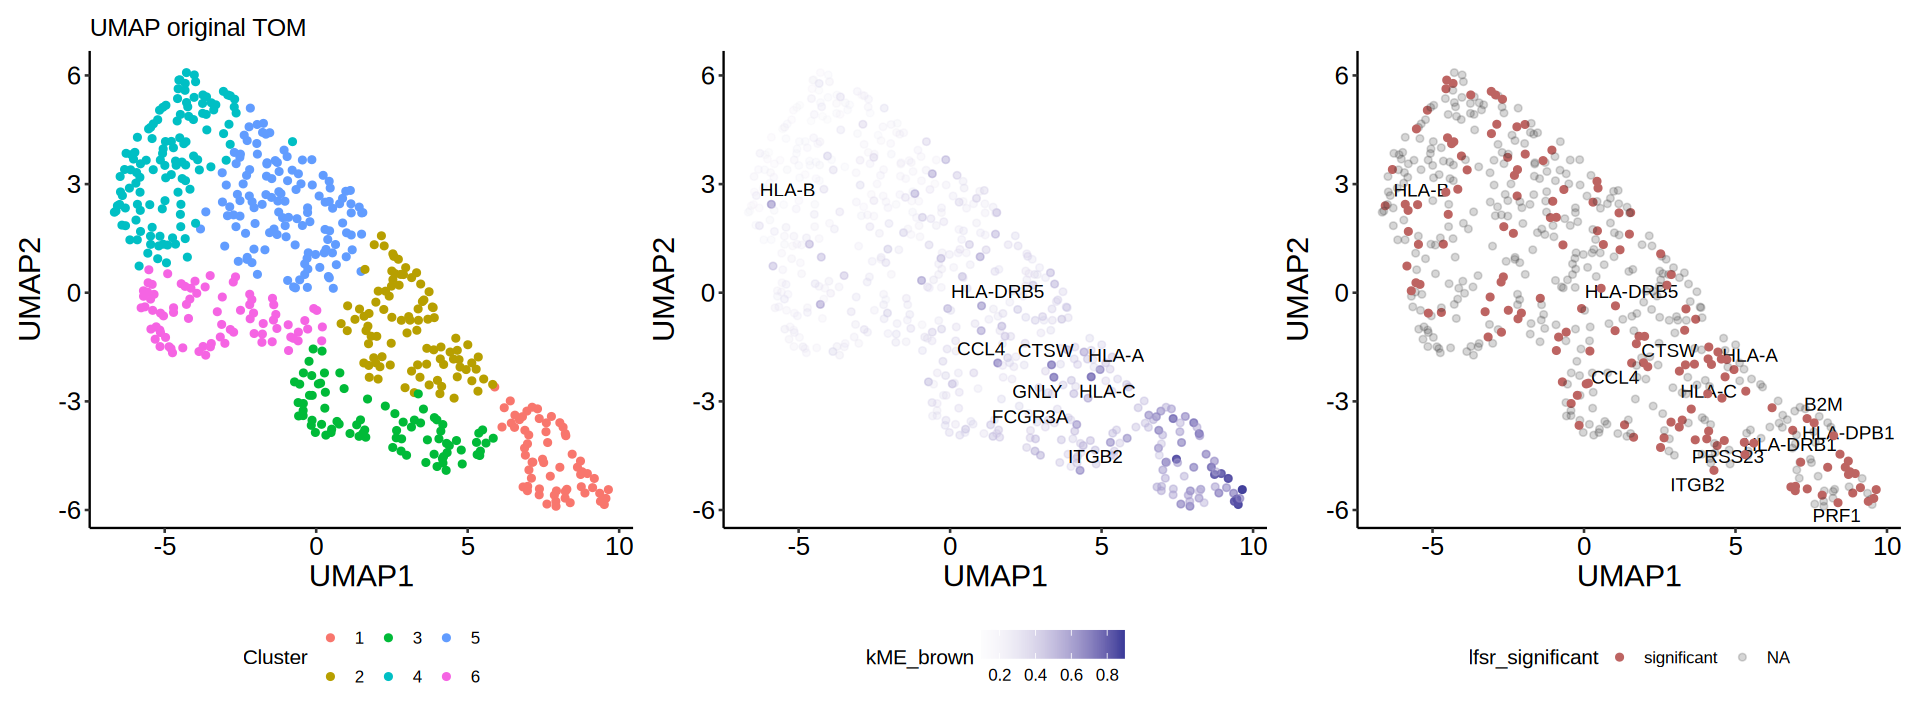

In [14]:
options(repr.plot.width = 16, repr.plot.height = 6)

c_color = "brown"
p1 = umap_tom_brown %>% filter(color == c_color) %>% 
  ggplot(aes(x = UMAP1, y = UMAP2, color = Cluster)) + 
  geom_point() + 
  theme_pubr()+
  theme(legend.position = "bottom") + ggtitle("UMAP original TOM")
p2 = umap_tom_brown %>% filter(color == c_color)%>% 
  mutate(label = ifelse(kME_brown > 0.5, gene_name, NA)) %>%
  ggplot(aes(x = UMAP1, y = UMAP2, color = kME_brown)) + 
  geom_point() + 
  geom_text_repel(aes(label = label), color = "black", max.overlaps = 10) +
  scale_color_gradient2(mid = 0.30)+
  theme_pubr()+
  theme(legend.position = "bottom")
p3 =  left_join(umap_tom_brown, df_map_cis, by = c("gene_name" = "phenotype_id")) %>%
  group_by(gene_name) %>%
  filter(grepl("CD8", prefix_file)) %>%
  top_n(n = 1, -lfsr) %>%
  distinct(gene_name, .keep_all = TRUE) %>%
  mutate(lfsr_significant = ifelse(lfsr < 0.05, "significant", NA),
  double_positive = ifelse((lfsr<0.05 & kME_brown > 0.5),gene_name, NA)
  ) %>%
  group_by(gene_name) %>% top_n(n=1, -lfsr) %>%
  filter(color == c_color) %>% 
  ggplot(aes(x = UMAP1, y = UMAP2, color = lfsr_significant)) + theme_pubr()+
  geom_text_repel(aes(label = double_positive), color = "black", max.overlaps = 10) +
  geom_point() + 
  scale_color_manual(values = "#BD6462",na.value = "#33333333")+
  theme(legend.position = "bottom") 
p1 + p2 + p3  & theme(
  axis.text= element_text(size = 15),
  axis.title= element_text(size = 18)
  ) 

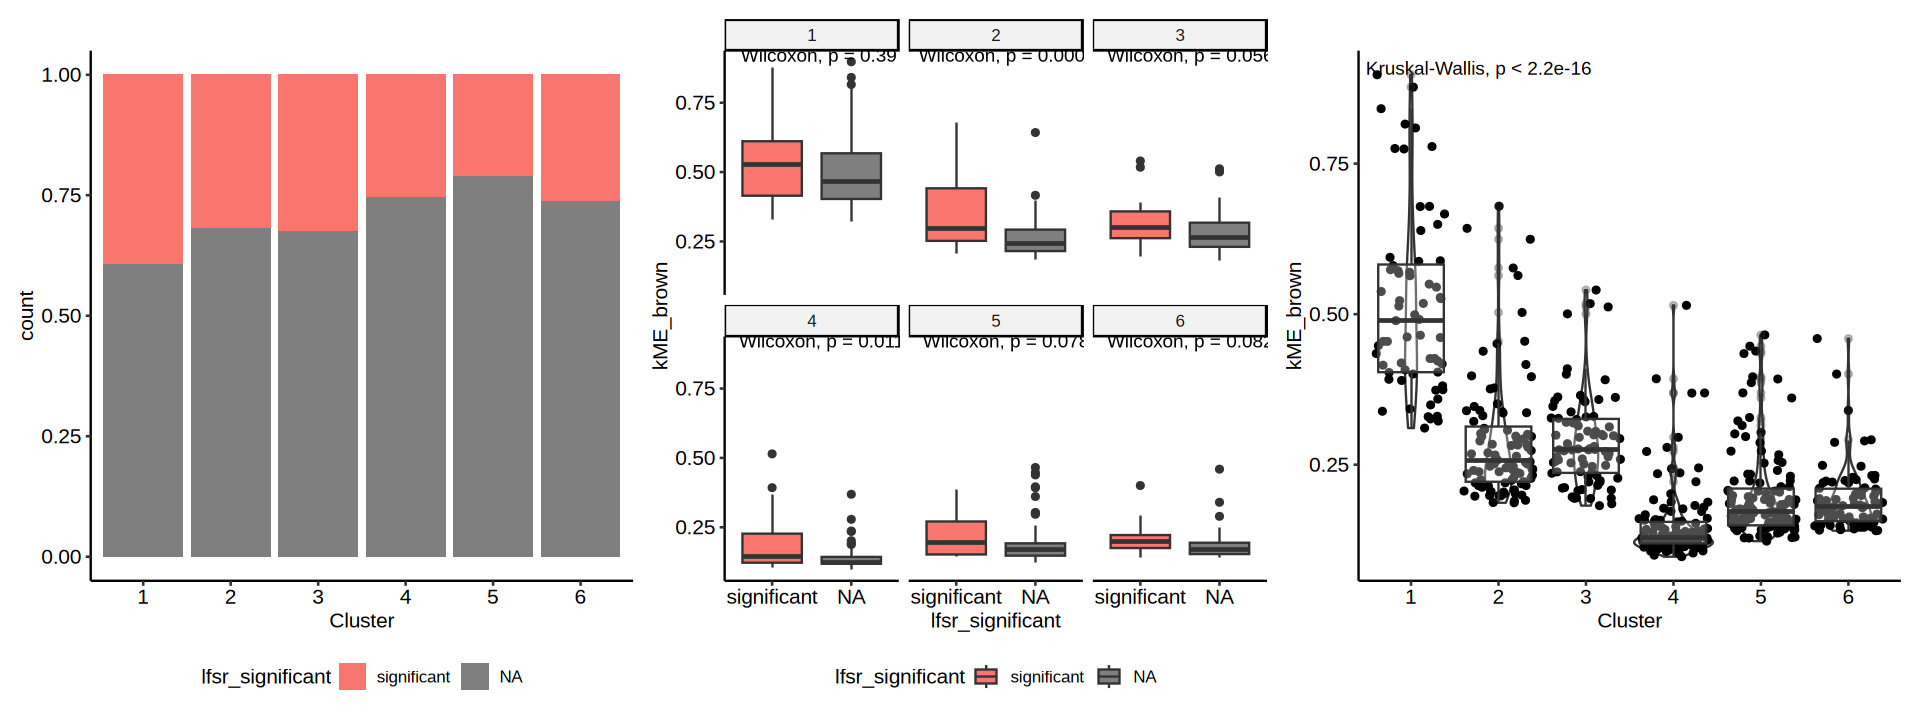

In [15]:
options(repr.plot.height = 6, repr.plot.width = 16)
p4 = left_join(umap_tom_brown, df_map_cis, by = c("gene_name" = "phenotype_id")) %>%
  group_by(gene_name) %>%
  filter(grepl("CD8", prefix_file)) %>%
  top_n(n = 1, -lfsr) %>%
  distinct(gene_name, .keep_all = TRUE) %>%
  mutate(lfsr_significant = ifelse((lfsr < 0.05), "significant", NA)) %>%
  ggplot(aes(x = Cluster, fill =lfsr_significant)) + geom_bar(position = "fill") +
  theme_pubr(legend = "bottom")

p5 = left_join(umap_tom_brown, df_map_cis, by = c("gene_name" = "phenotype_id")) %>%
  group_by(gene_name) %>%
  filter(grepl("CD8", prefix_file)) %>%
  top_n(n = 1, -lfsr) %>%
  distinct(gene_name, .keep_all = TRUE) %>%
  mutate(lfsr_significant = ifelse((lfsr < 0.05), "significant", NA)) %>%
  ggplot(aes(x = lfsr_significant, y = kME_brown, fill = lfsr_significant)) + geom_boxplot() + facet_wrap(~Cluster) + stat_compare_means() +
  theme_pubr(legend = "bottom")

p6 = umap_tom_brown %>% ggplot(aes(x =Cluster, y = kME_brown)) +  geom_violin() + geom_jitter() +stat_compare_means() + geom_boxplot(alpha = 0.3) +
  theme_pubr(legend = "bottom")

p4 + p5 + p6

Warning message:
“Removed 469 rows containing missing values or values outside the scale range
(`geom_text_repel()`).”
Warning message:
“Removed 486 rows containing missing values or values outside the scale range
(`geom_text_repel()`).”
Warning message:
“ggrepel: 12 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


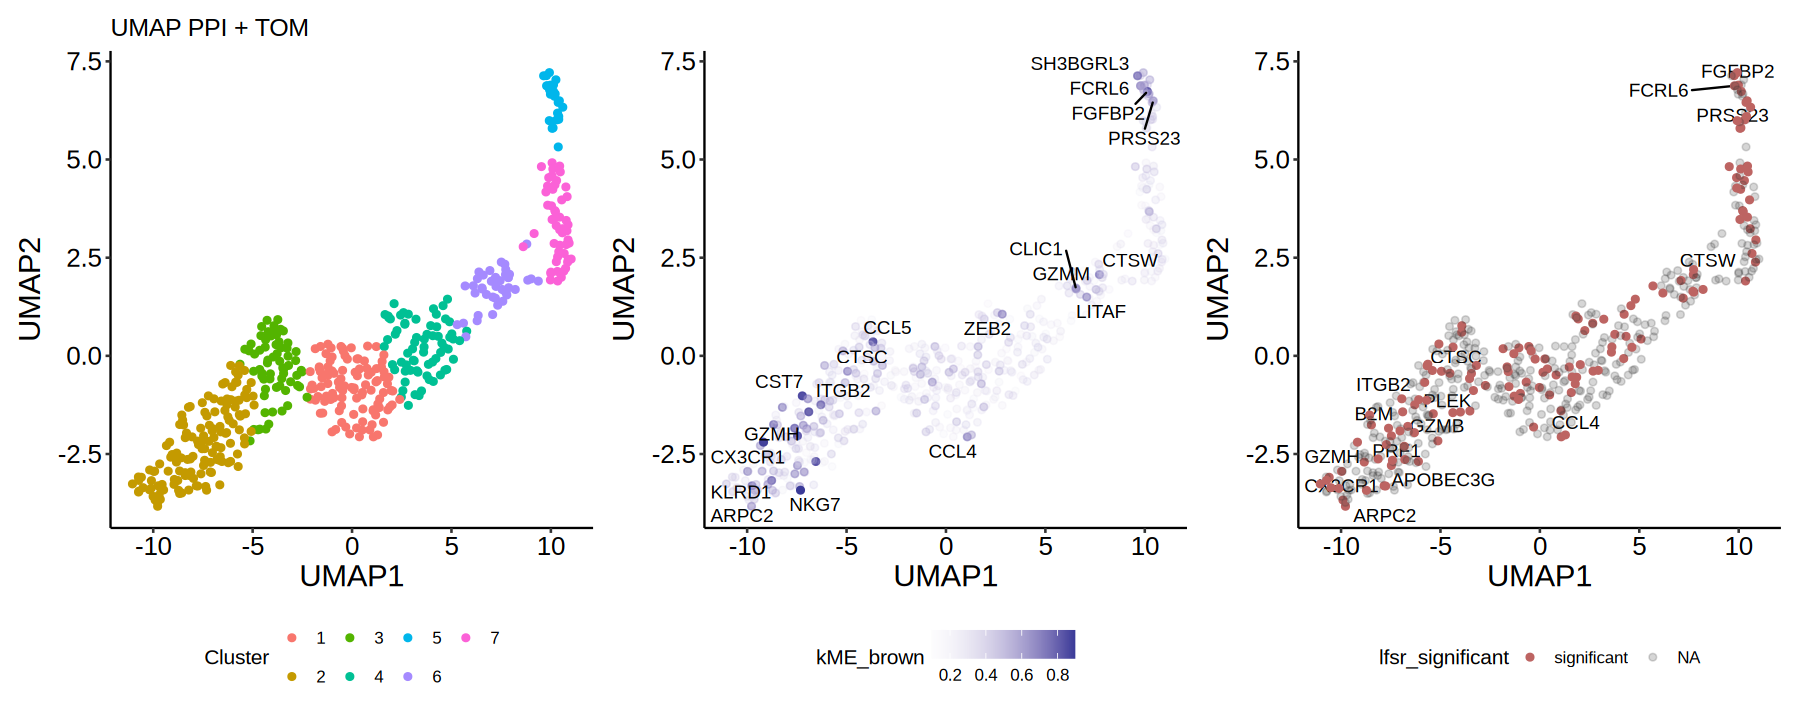

In [16]:
options(repr.plot.width = 15, repr.plot.height = 6)
c_color = "brown"
p1 = list_res_brown$umap_df %>% filter(color == c_color) %>% 
  ggplot(aes(x = UMAP1, y = UMAP2, color = Cluster)) + 
  geom_point() + 
  theme_pubr()+
  theme(legend.position = "bottom") + ggtitle("UMAP PPI + TOM")
p2 = list_res_brown$umap_df %>% filter(color == c_color)%>% 
  mutate(label = ifelse(kME_brown > 0.5, gene_name, NA)) %>%
  ggplot(aes(x = UMAP1, y = UMAP2, color = kME_brown)) + 
  geom_point() + 
  geom_text_repel(aes(label = label), color = "black", max.overlaps = 10) +
  scale_color_gradient2(mid = 0.30)+
  theme_pubr()+
  theme(legend.position = "bottom")
p3 =  left_join(list_res_brown$umap_df, df_map_cis, by = c("gene_name" = "phenotype_id")) %>%
  group_by(gene_name) %>%
  filter(grepl("CD8", prefix_file)) %>%
  top_n(n = 1, -lfsr) %>%
  distinct(gene_name, .keep_all = TRUE) %>%
  mutate(lfsr_significant = ifelse(lfsr < 0.05, "significant", NA),
  double_positive = ifelse((lfsr<0.05 & kME_brown > 0.5),gene_name, NA)
  ) %>%
  group_by(gene_name) %>% top_n(n=1, -lfsr) %>%
  filter(color == c_color) %>% 
  ggplot(aes(x = UMAP1, y = UMAP2, color = lfsr_significant)) + theme_pubr()+
  geom_text_repel(aes(label = double_positive), color = "black", max.overlaps = 10) +
  geom_point() + 
  scale_color_manual(values = "#BD6462",na.value = "#33333333")+
  theme(legend.position = "bottom") 
p1 + p2 + p3  & theme(
  axis.text= element_text(size = 15),
  axis.title= element_text(size = 18)
  )

Joining with `by = join_by(gene_name)`
Warning message:
“Removed 469 rows containing missing values or values outside the scale range
(`geom_text_repel()`).”


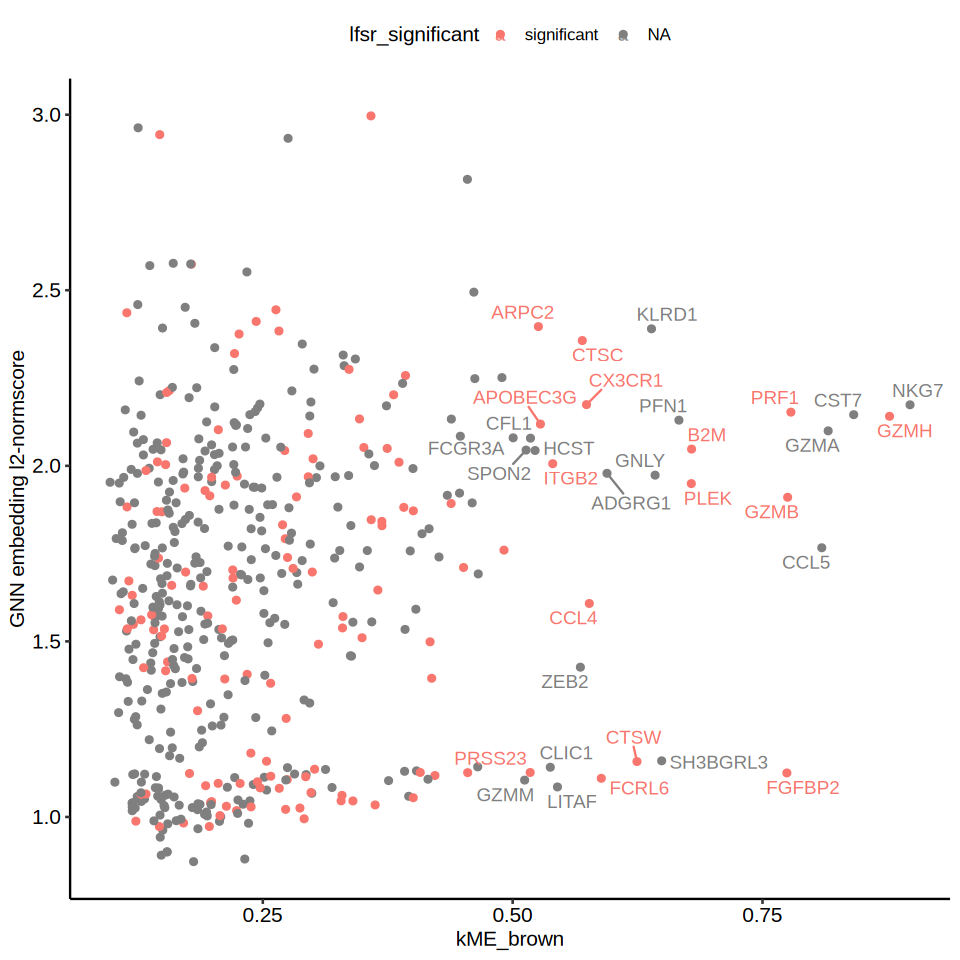

In [17]:
options(repr.plot.width = 8, repr.plot.height = 8)
c_color = "brown"
df_embedding_selected = df_embedding %>% select(gene_name,embedding_norm)
list_res_brown$umap_df %>% filter(color == c_color)%>% 
  mutate(label = ifelse(kME_brown > 0.5, gene_name, NA)) %>%
  left_join(df_embedding_selected) %>%
  left_join(df_map_cis, by = c("gene_name" = "phenotype_id")) %>%
  group_by(gene_name) %>%
  filter(grepl("CD8", prefix_file)) %>%
  top_n(n = 1, -lfsr) %>%
  mutate(lfsr_significant = ifelse(lfsr < 0.05, "significant", NA)) %>%
  distinct(gene_name, .keep_all = TRUE)  %>%
  ggplot(aes(x = kME_brown, y = embedding_norm, color = lfsr_significant)) + 
    geom_point() + 
    geom_text_repel(aes(label= label)) +
    ylab("GNN embedding l2-normscore") +
    theme_pubr()

  #ggsave("figure_prep/pML_brown_vs_embedding.pdf", width = 5, height = 5, dpi = 300)

Joining with `by = join_by(gene_name)`
Joining with `by = join_by(gene_name)`


Joining with `by = join_by(gene_name)`
Warning message:
“Removed 469 rows containing missing values or values outside the scale range
(`geom_text_repel()`).”
Warning message:
“Removed 478 rows containing missing values or values outside the scale range
(`geom_text_repel()`).”
Warning message:
“Removed 478 rows containing missing values or values outside the scale range
(`geom_text_repel()`).”
Warning message:
“ggrepel: 9 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 9 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 9 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“Removed 469 rows containing missing values or values outside the scale range
(`geom_text_repel()`).”
Warning message:
“Removed 478 rows containing missing values or values outside the scale range
(`geom_text_repel()`).”
Warning message:
“Removed 478 rows containing mi

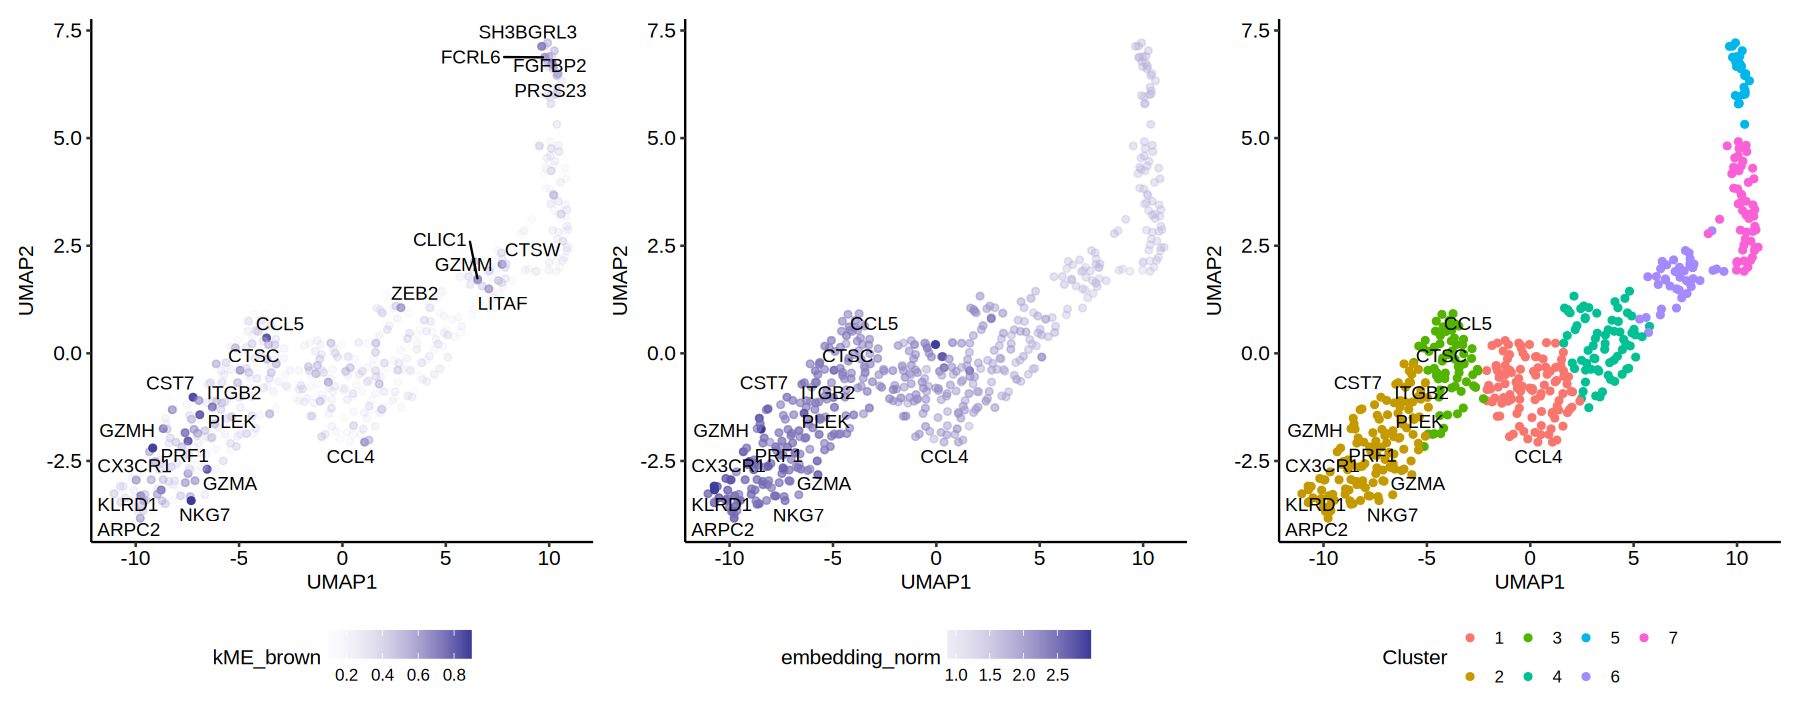

In [18]:
p1 = list_res_brown$umap_df %>% filter(color == c_color)%>% 
  mutate(label = ifelse(kME_brown > 0.5, gene_name, NA)) %>%
  left_join(df_embedding_selected) %>%
  left_join(df_map_cis, by = c("gene_name" = "phenotype_id")) %>%
  group_by(gene_name) %>%
  filter(grepl("CD8", prefix_file)) %>%
  top_n(n = 1, -lfsr) %>%
  mutate(lfsr_significant = ifelse(lfsr < 0.05, "significant", NA),
  double_positive = ifelse((kME_brown > 0.5& embedding_norm > 1.5), gene_name, NA)) %>%
  distinct(gene_name, .keep_all = TRUE) %>%
  ggplot(aes(x = UMAP1, y = UMAP2, label = double_positive)) +
  geom_point(aes(color = Cluster)) +
  geom_text_repel() +
  theme_pubr()+
  theme(legend.position = "bottom")

p2= list_res_brown$umap_df %>% filter(color == c_color)%>% 
  mutate(label = ifelse(kME_brown > 0.5, gene_name, NA)) %>%
  left_join(df_embedding_selected) %>%
  left_join(df_map_cis, by = c("gene_name" = "phenotype_id")) %>%
  group_by(gene_name) %>%
  filter(grepl("CD8", prefix_file)) %>%
  top_n(n = 1, -lfsr) %>%
  mutate(lfsr_significant = ifelse(lfsr < 0.05, "significant", NA),
  double_positive = ifelse((kME_brown > 0.5 & embedding_norm > 1.5), gene_name, NA)) %>%
  distinct(gene_name, .keep_all = TRUE) %>%
  ggplot(aes(x = UMAP1, y = UMAP2, label = double_positive)) +
  geom_point(aes(color = embedding_norm)) +
  geom_text_repel() + scale_color_gradient2(mid = 0.30)+
  theme_pubr()+
  theme(legend.position = "bottom")

p3= list_res_brown$umap_df %>% filter(color == c_color)%>% 
  mutate(label = ifelse(kME_brown > 0.5, gene_name, NA)) %>%
  left_join(df_embedding_selected) %>%
  left_join(df_map_cis, by = c("gene_name" = "phenotype_id")) %>%
  group_by(gene_name) %>%
  filter(grepl("CD8", prefix_file)) %>%
  top_n(n = 1, -lfsr) %>%
  mutate(lfsr_significant = ifelse(lfsr < 0.05, "significant", NA),
  double_positive = ifelse((kME_brown > 0.5 ), gene_name, NA)) %>%
  distinct(gene_name, .keep_all = TRUE) %>%
  ggplot(aes(x = UMAP1, y = UMAP2, label = double_positive)) +
  geom_point(aes(color = kME_brown)) +
  geom_text_repel() + scale_color_gradient2(mid = 0.30) +
  theme_pubr()+
  theme(legend.position = "bottom")
options(repr.plot.height = 6, repr.plot.width = 15)
 p3 + p2 + p1

ggsave("figure_prep/pML_mainplot.pdf", width = 15, height = 6, dpi = 300)

In [ ]:
tcell_signature = read_delim("assets/module_assignment_network/module.txt")

Rows: 56 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): module, gene_name

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


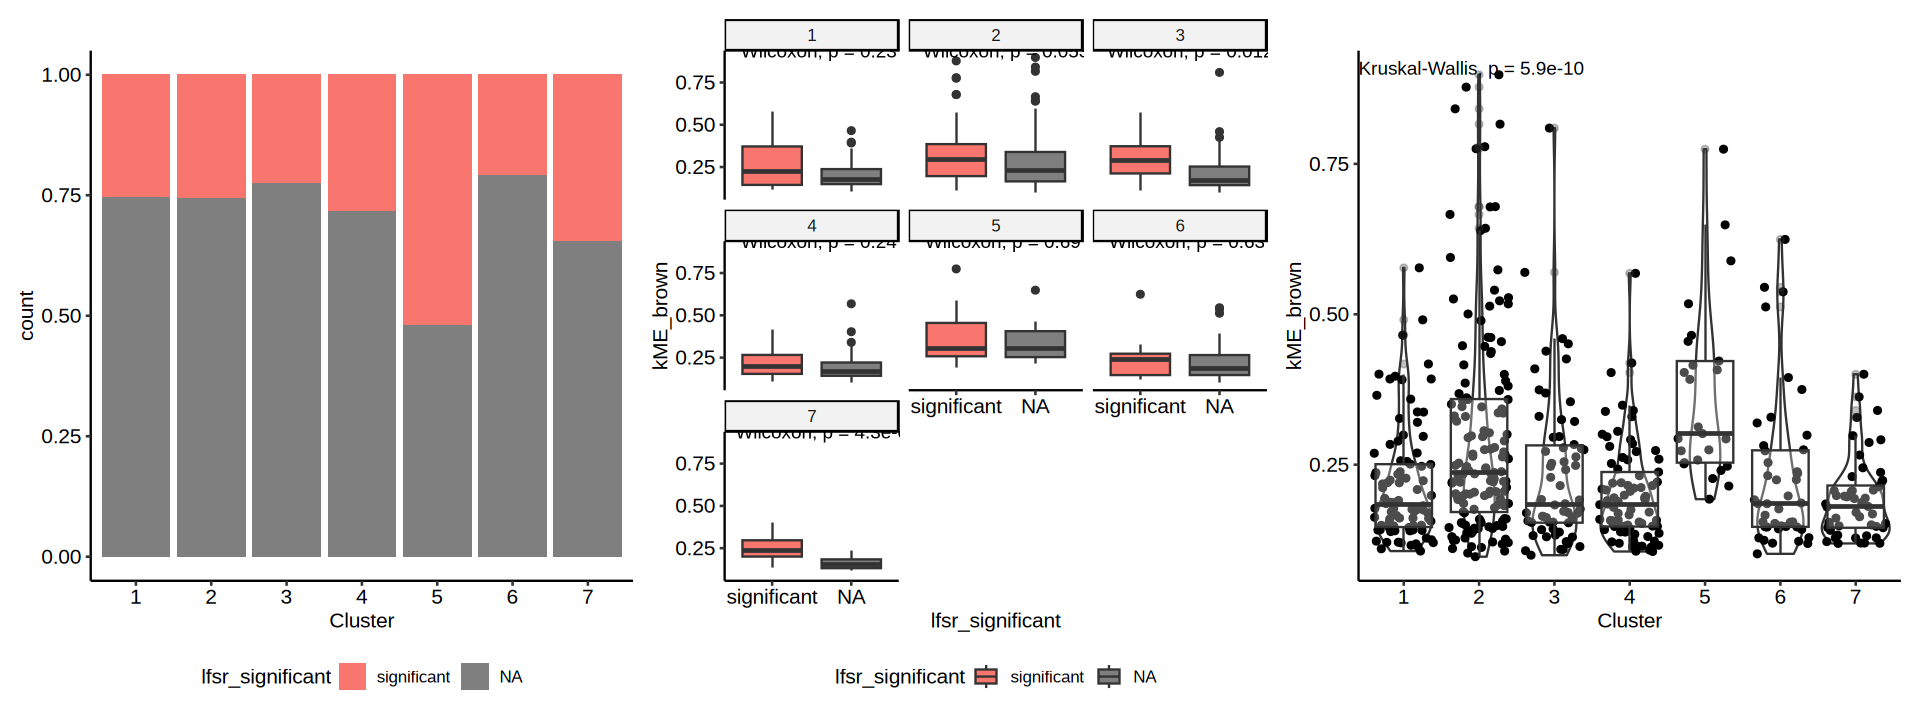

In [ ]:
options(repr.plot.height = 6, repr.plot.width = 16)
p4 = left_join(list_res_brown$umap_df, df_map_cis, by = c("gene_name" = "phenotype_id")) %>%
  group_by(gene_name) %>%
  filter(grepl("CD8", prefix_file)) %>%
  top_n(n = 1, -lfsr) %>%
  distinct(gene_name, .keep_all = TRUE) %>%
  mutate(lfsr_significant = ifelse((lfsr < 0.05), "significant", NA)) %>%
  ggplot(aes(x = Cluster, fill =lfsr_significant)) + geom_bar(position = "fill") +
  theme_pubr(legend = "bottom")

p5 = left_join(list_res_brown$umap_df, df_map_cis, by = c("gene_name" = "phenotype_id")) %>%
  group_by(gene_name) %>%
  filter(grepl("CD8", prefix_file)) %>%
  top_n(n = 1, -lfsr) %>%
  distinct(gene_name, .keep_all = TRUE) %>%
  mutate(lfsr_significant = ifelse((lfsr < 0.05), "significant", NA)) %>%
  ggplot(aes(x = lfsr_significant, y = kME_brown, fill = lfsr_significant)) + geom_boxplot() + facet_wrap(~Cluster) + stat_compare_means() +
  theme_pubr(legend = "bottom")

p6 = list_res_brown$umap_df %>% ggplot(aes(x =Cluster, y = kME_brown)) +  geom_violin() + geom_jitter() +stat_compare_means() + geom_boxplot(alpha = 0.3) +
  theme_pubr(legend = "bottom")

p4 + p5 + p6

In [ ]:
library(enrichR)
dbs <- c("GO_Molecular_Function_2023", "GO_Cellular_Component_2023",
         "GO_Biological_Process_2023")

In [ ]:
list_res_brown$umap_df %>% filter(gene_name == "TBX21")

gene_name,UMAP1,UMAP2,Cluster,module,color,kME_grey,kME_brown,kME_turquoise,kME_pink,kME_blue,kME_black,kME_green,kME_yellow,kME_magenta,kME_red,kME_purple
<chr>,<dbl>,<dbl>,<fct>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TBX21,-3.547926,-2.530688,1,brown,brown,0.04725495,0.3652946,-0.3315342,0.1401988,-0.03818082,0.2772332,-0.06648089,0.1406289,-0.02209981,0.2612127,0.09464675


In [ ]:
c_cluster = c(7)
list_res_brown$umap_df %>% filter(Cluster %in% c_cluster) %>% pull(gene_name)
gnn_network_candidate = list_res_brown$umap_df %>% filter(Cluster %in% c_cluster)%>% pull(gene_name)

[1] "ADGRG5"   "APMAP"    "CDK2AP2"  "CEP78"    "CISD3"    "CLIC3"   
 [7] "CYB561D2" "DHRS7"    "FCRL6"    "FGFBP2"   "OSTF1"    "PLAAT4"  
[13] "PRELID1"  "PRSS23"   "PYHIN1"   "RAB29"    "SAMD3"    "SERF2"   
[19] "SH3BGRL3" "TESC"     "TMEM50A"  "TOX"      "TPST2"    "TTC38"   
[25] "ZBTB38"

In [ ]:
list_res_tom = list()
for (idx in unique(as.double(umap_tom_brown$Cluster))) {
    each_gnn_network_candidate = umap_tom_brown %>% filter(Cluster == idx) %>% pull(gene_name)
    list_each = enrichr(each_gnn_network_candidate, dbs)
    df_each = list_each %>% bind_rows(.id = "db") %>% mutate(Cluster = idx)
    list_res_tom[[idx]] = df_each
}



Uploading data to Enrichr... Done.
  Querying GO_Molecular_Function_2023... Done.
  Querying GO_Cellular_Component_2023... Done.
  Querying GO_Biological_Process_2023... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Molecular_Function_2023... Done.
  Querying GO_Cellular_Component_2023... Done.
  Querying GO_Biological_Process_2023... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Molecular_Function_2023... Done.
  Querying GO_Cellular_Component_2023... Done.
  Querying GO_Biological_Process_2023... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Molecular_Function_2023... Done.
  Querying GO_Cellular_Component_2023... Done.
  Querying GO_Biological_Process_2023... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Molecular_Function_2023... Done.
  Querying GO_Cellular_Component_2023... Done.
  Querying GO_Biological_Process_2023... Done.
Parsing results... D

In [ ]:
list_res = list()
for (idx in unique(as.double(list_res_brown$umap_df$Cluster))) {
    each_gnn_network_candidate = list_res_brown$umap_df %>% filter(Cluster == idx) %>% pull(gene_name)
    list_each = enrichr(each_gnn_network_candidate, dbs)
    df_each = list_each %>% bind_rows(.id = "db") %>% mutate(Cluster = idx)
    list_res[[idx]] = df_each
}



Uploading data to Enrichr... Done.
  Querying GO_Molecular_Function_2023... Done.
  Querying GO_Cellular_Component_2023... Done.
  Querying GO_Biological_Process_2023... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Molecular_Function_2023... Done.
  Querying GO_Cellular_Component_2023... Done.
  Querying GO_Biological_Process_2023... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Molecular_Function_2023... Done.
  Querying GO_Cellular_Component_2023... Done.
  Querying GO_Biological_Process_2023... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Molecular_Function_2023... Done.
  Querying GO_Cellular_Component_2023... Done.
  Querying GO_Biological_Process_2023... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Molecular_Function_2023... Done.
  Querying GO_Cellular_Component_2023... Done.
  Querying GO_Biological_Process_2023... Done.
Parsing results... D

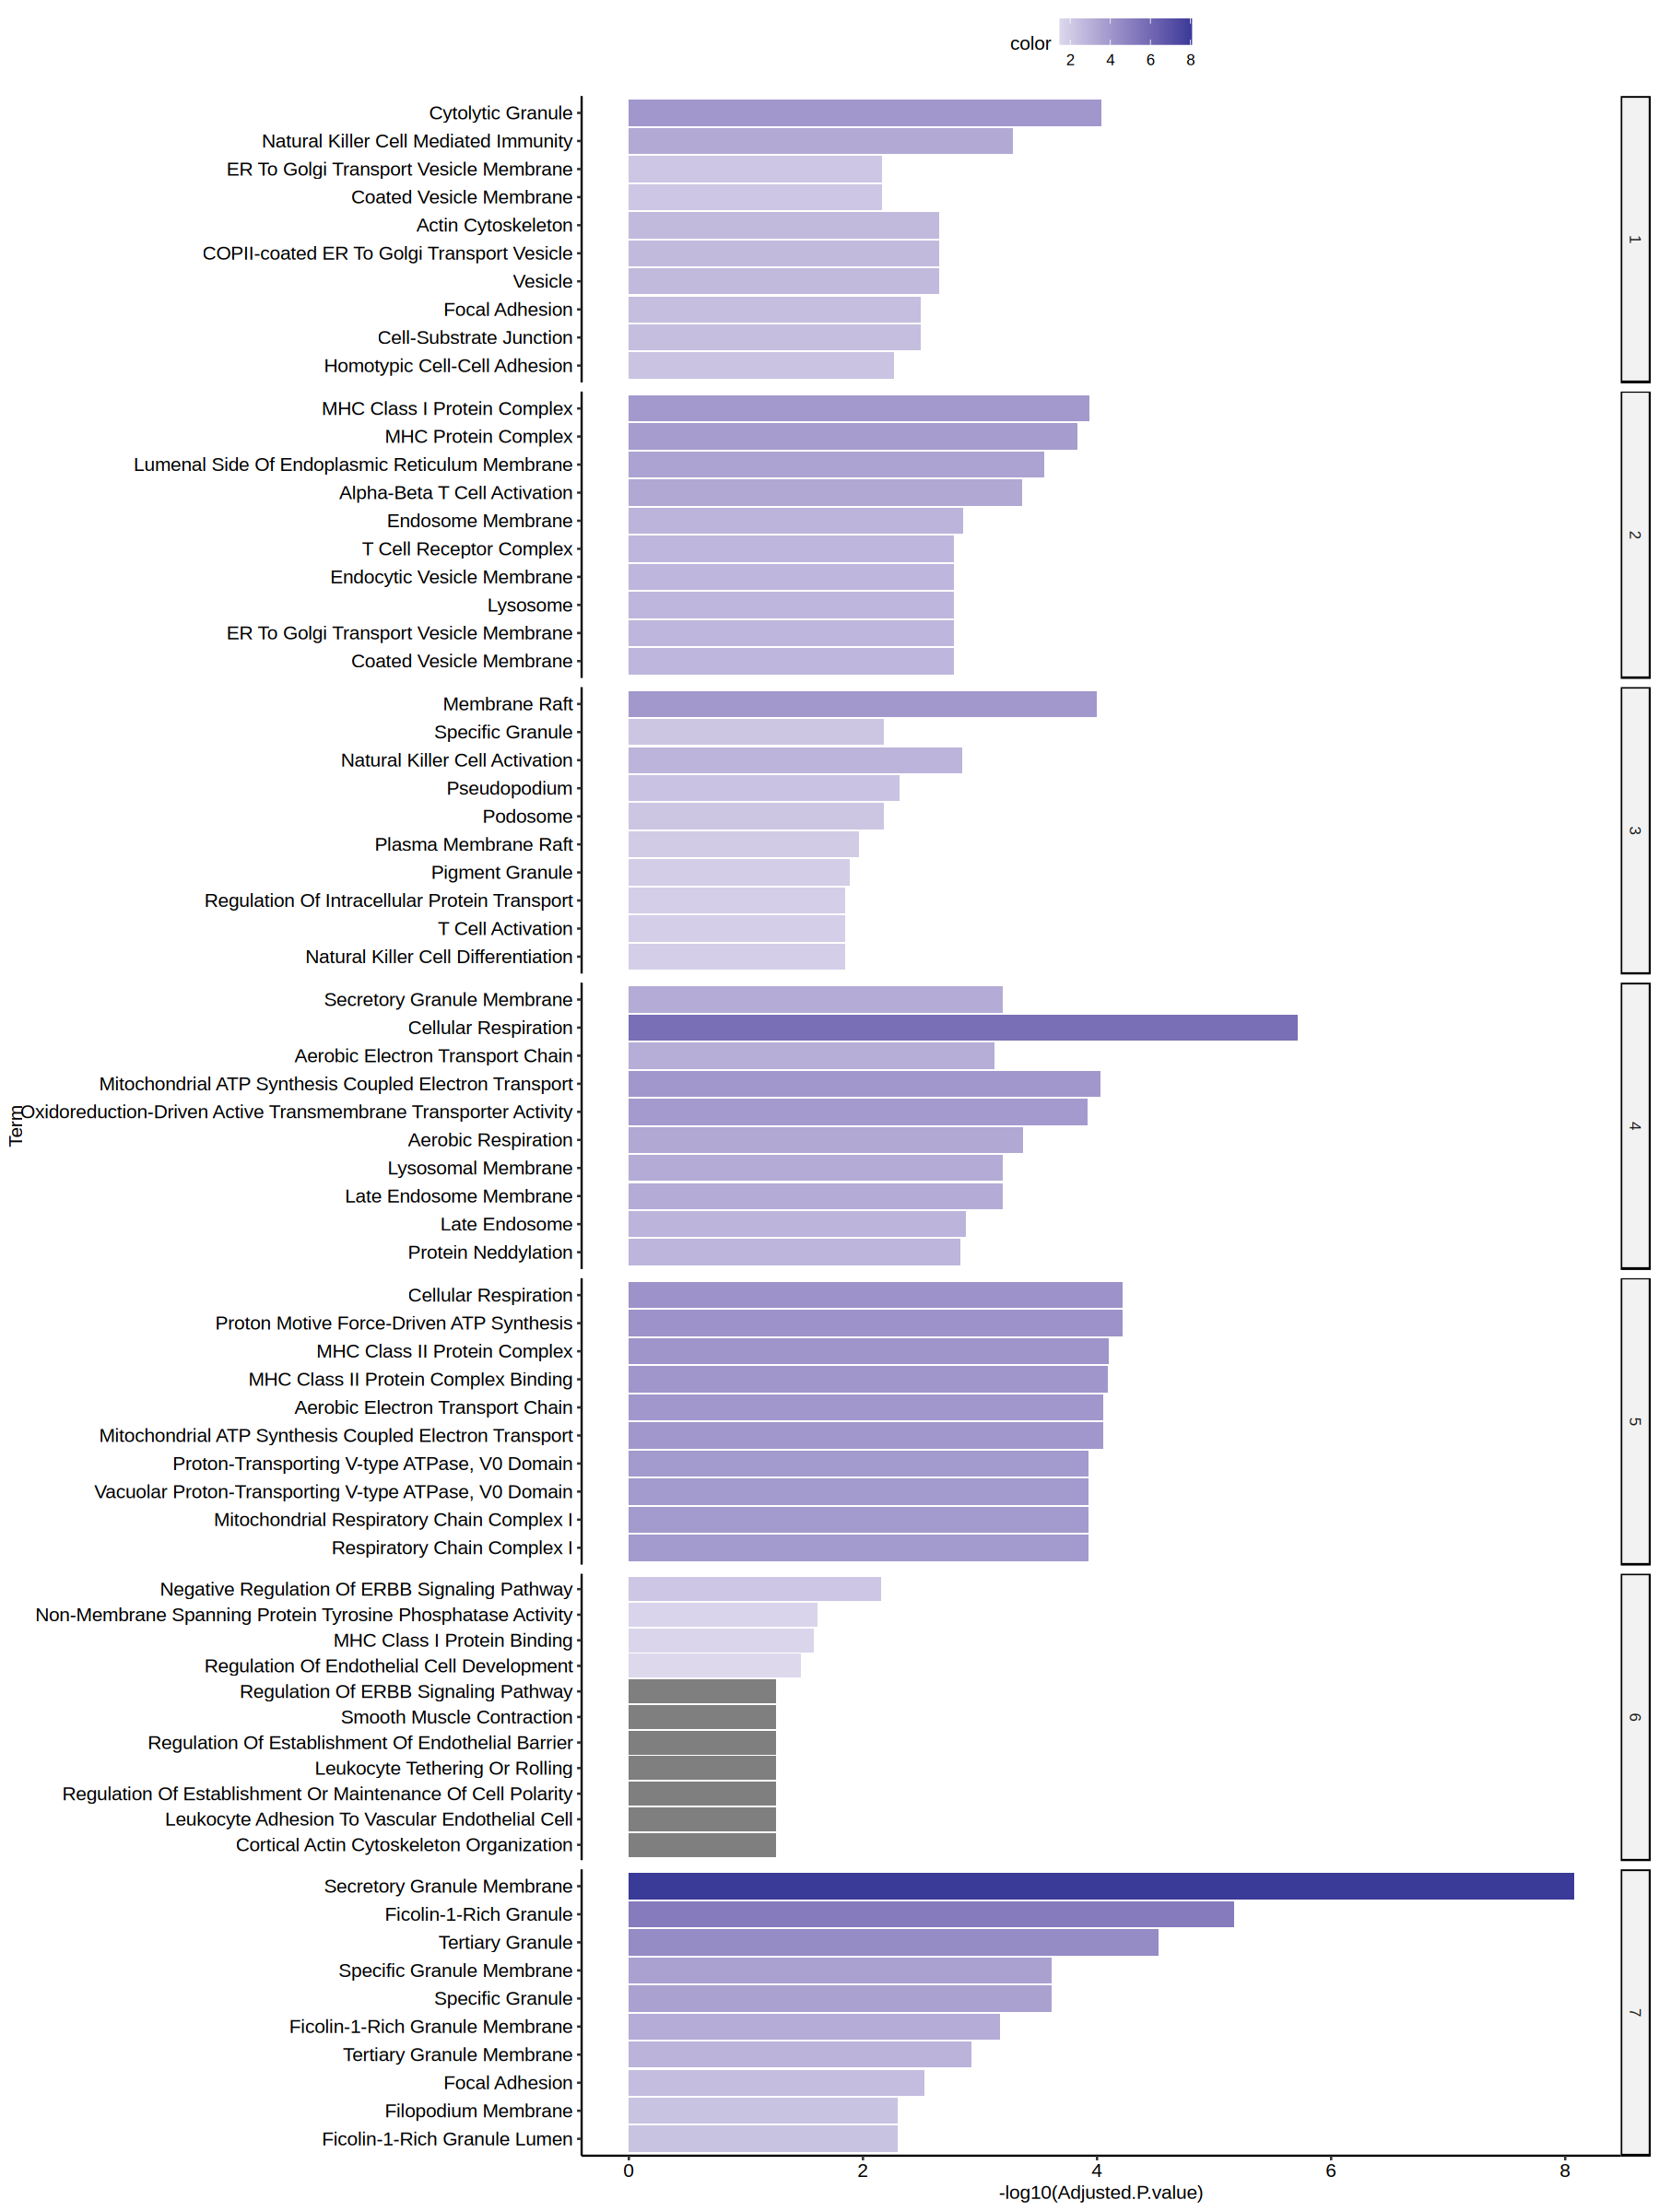

In [ ]:
options(repr.plot.height = 20, repr.plot.width = 15)
list_res_tom%>% 
  bind_rows() %>% 
  arrange(Adjusted.P.value) %>% 
  group_by(Cluster) %>%
  top_n(-Adjusted.P.value, n = 10) %>%
  top_n(Combined.Score, n = 10) %>%
  arrange(Adjusted.P.value) %>%
  mutate(
    color = ifelse(Adjusted.P.value< 0.05, -log10(Adjusted.P.value), NA),
    Term = str_sub(Term, 1, -14),
    ) %>%
  mutate(
    Term = factor(Term, levels = rev(unique(.$Term)))
  ) %>%
  ggplot(aes(x = -log10(Adjusted.P.value), y = Term, fill = color)) + 
    geom_bar(stat = "identity") + 
    facet_grid(rows= vars(Cluster), scales = "free") + 
    scale_fill_gradient2()+
    theme_pubr()

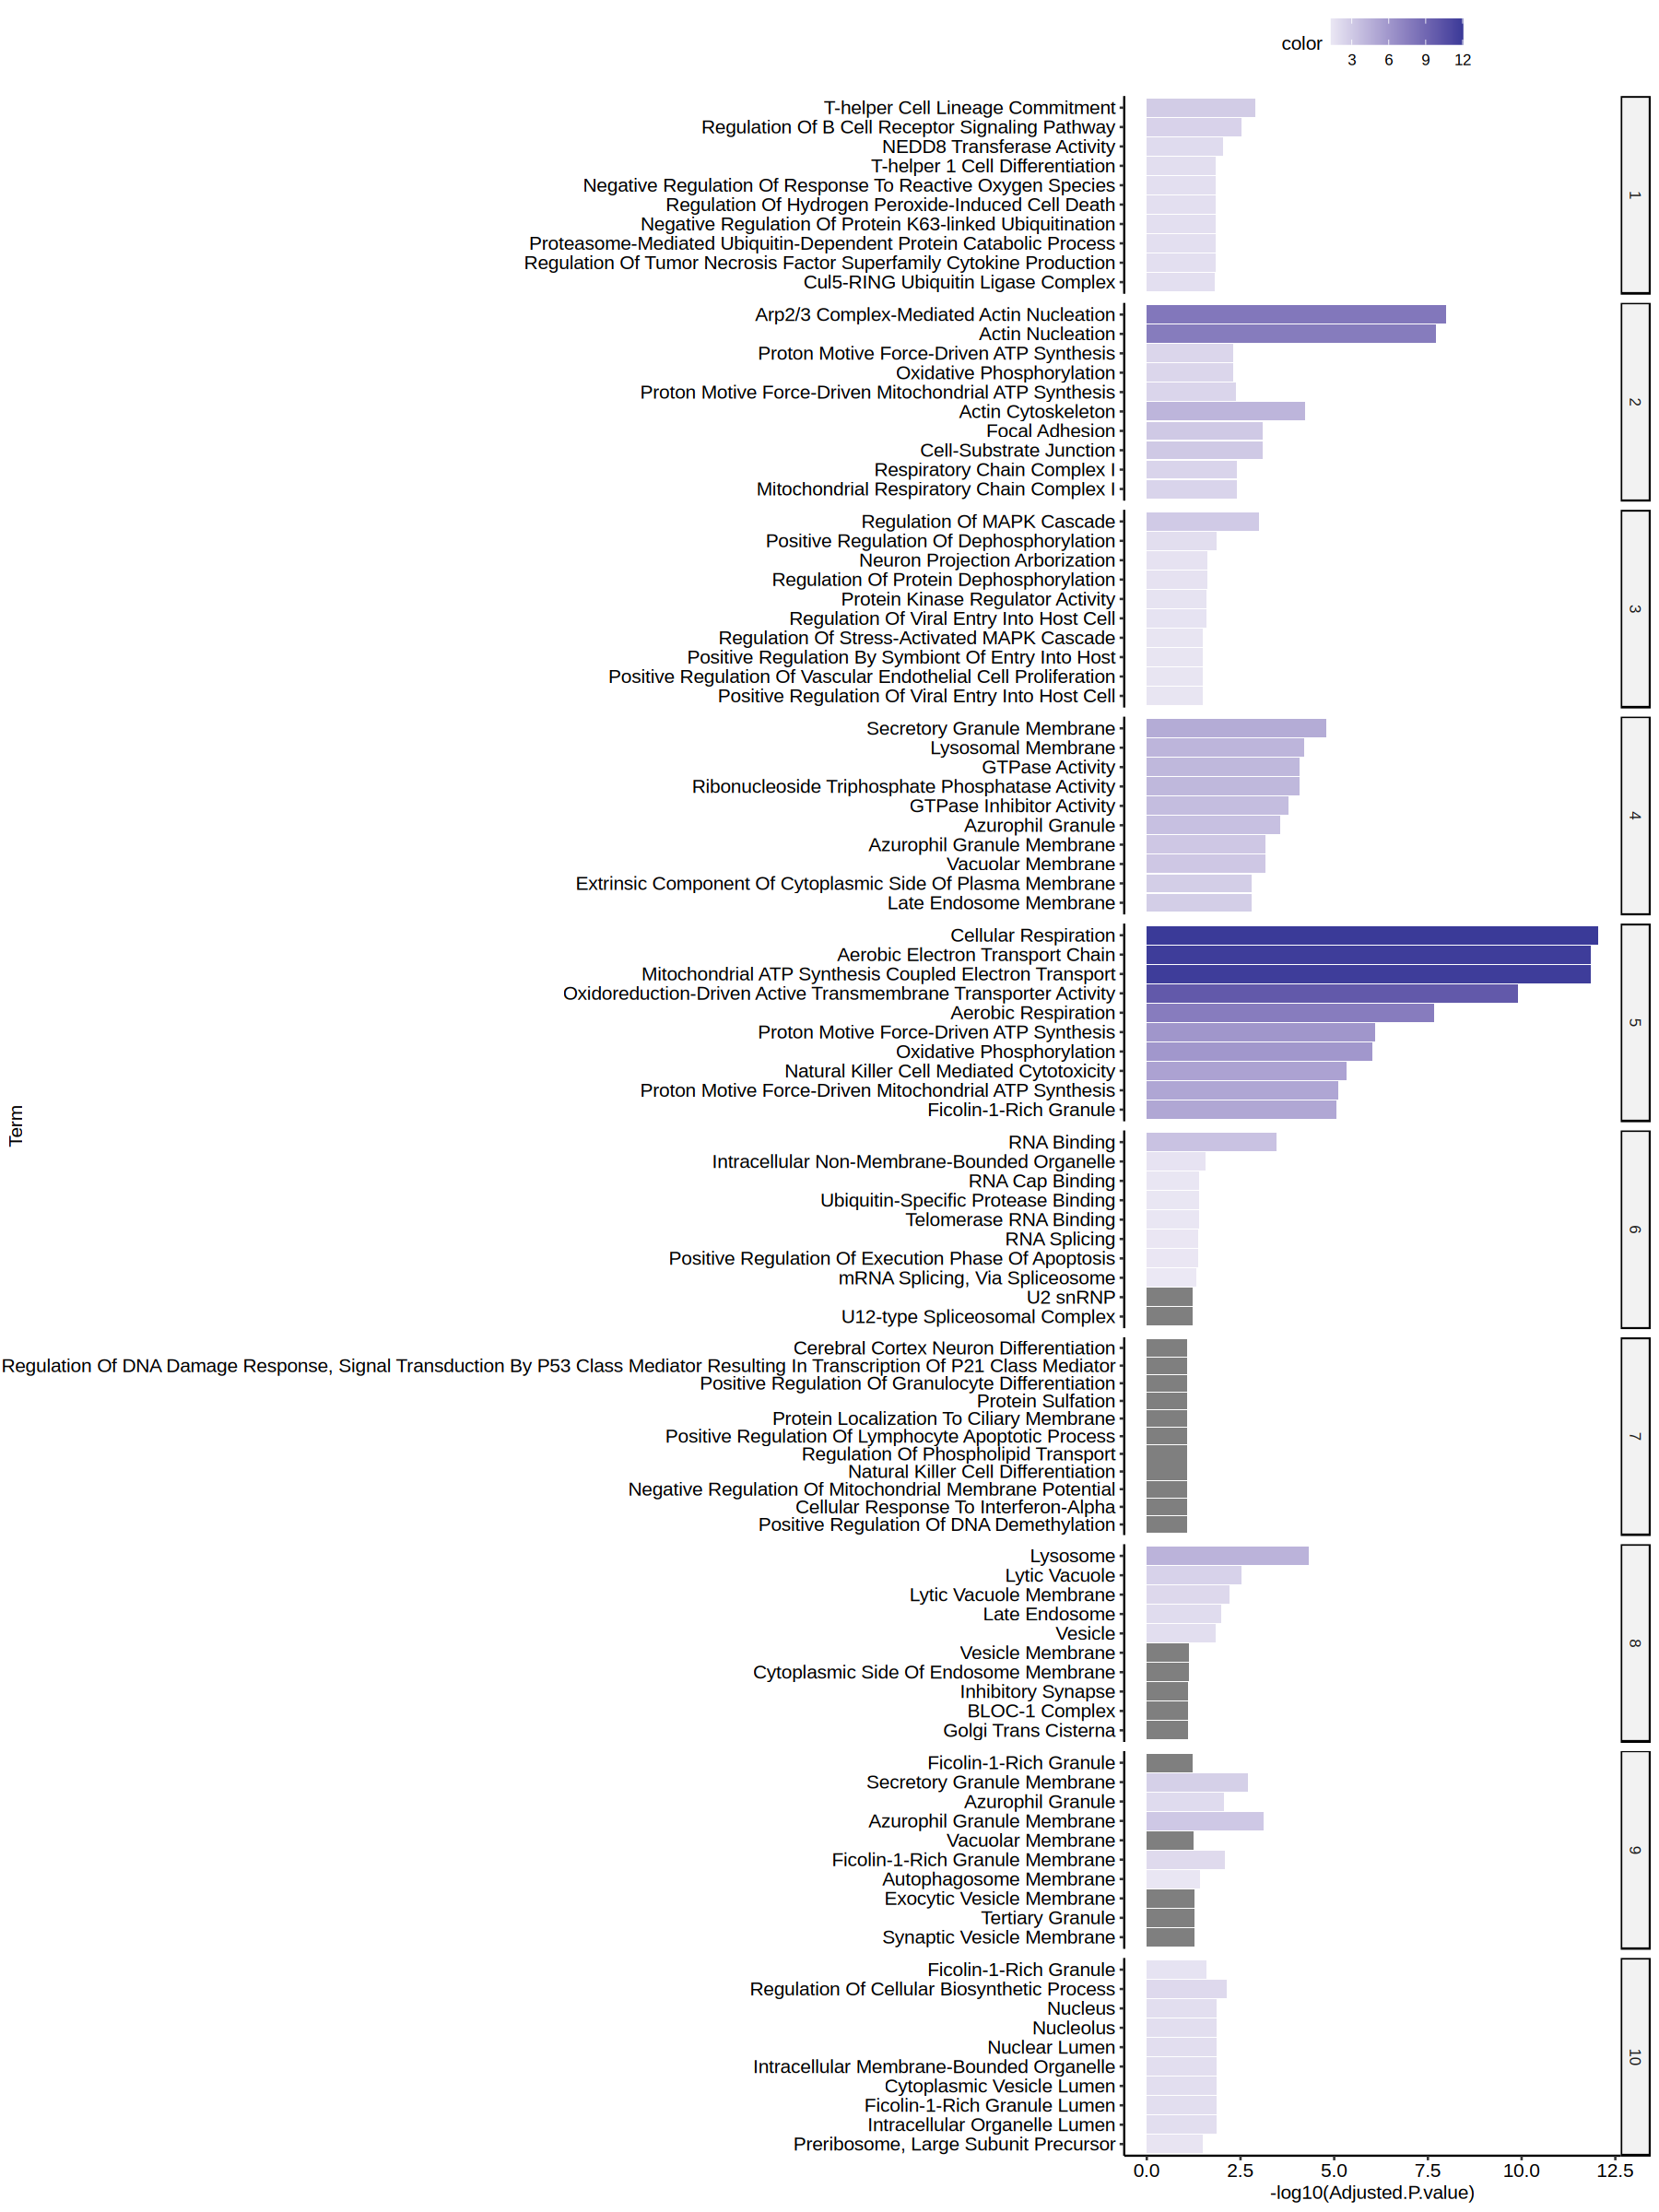

In [ ]:
options(repr.plot.height = 20, repr.plot.width = 15)
list_res %>% 
  bind_rows() %>% 
  arrange(Adjusted.P.value) %>% 
  group_by(Cluster) %>%
  top_n(-Adjusted.P.value, n = 10) %>%
  top_n(Combined.Score, n = 10) %>%
  arrange(Adjusted.P.value) %>%
  mutate(
    color = ifelse(Adjusted.P.value< 0.05, -log10(Adjusted.P.value), NA),
    Term = str_sub(Term, 1, -14),
    ) %>%
  mutate(
    Term = factor(Term, levels = rev(unique(.$Term)))
  ) %>%
  ggplot(aes(x = -log10(Adjusted.P.value), y = Term, fill = color)) + 
    geom_bar(stat = "identity") + 
    facet_grid(rows= vars(Cluster), scales = "free") + 
    scale_fill_gradient2()+
    theme_pubr()

In [ ]:

df_test = list_res_brown$umap_df %>% 
  pull(gene_name) %>% 
  enrichr(., dbs) %>% 
  bind_rows(.id = "db")


Uploading data to Enrichr... Done.
  Querying GO_Molecular_Function_2023... Done.
  Querying GO_Cellular_Component_2023... Done.
  Querying GO_Biological_Process_2023... Done.
Parsing results... Done.


In [ ]:
library(fgsea)
library(msigdbr)

In [ ]:
go_df = msigdbr(species = "Homo sapiens", category = "C5") 
fgsea_sets =  go_df %>% split(x = .$gene_symbol, f = .$gs_name)
hallmark_df = msigdbr(species = "Homo sapiens", category = "H") 
fgsea_sets_hallmark =  hallmark_df  %>% split(x = .$gene_symbol, f = .$gs_name)
our_sets = df_full_gene_modulescore %>% 
  filter(color == "brown") %>%
  select(gene_name, kME_brown) %>%
  deframe()
df_go_gsea_res = fgsea(fgsea_sets,our_sets, scoreType = "pos") 
df_go_gsea_res %>% arrange(-NES) %>% filter(grepl("GOBP", pathway)) %>% top_n(NES, n = 10)
df_hallmark_gsea_res = fgsea(fgsea_sets_hallmark,our_sets, scoreType = "pos") 
df_hallmark_gsea_res %>% arrange(-NES) %>% top_n(NES, n = 10)

pathway,pval,padj,log2err,ES,NES,size,leadingEdge
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<list>
GOBP_CYTOLYSIS,9.668723e-07,5.010212e-04,0.6435518,0.9389587,2.505463,5,"GZMH, GZ...."
GOBP_IMMUNE_RESPONSE_TO_TUMOR_CELL,1.104569e-05,2.775147e-03,0.5933255,0.9104147,2.429298,5,"NKG7, PR...."
GOBP_CELL_KILLING,6.868837e-08,7.118691e-05,0.7049757,0.6705904,2.423007,29,"NKG7, PR...."
GOBP_ANTIGEN_PROCESSING_AND_PRESENTATION_OF_ENDOGENOUS_ANTIGEN,3.283392e-05,5.041224e-03,0.5573322,0.8010732,2.409612,9,"HLA-C, B...."
GOBP_GRANZYME_MEDIATED_PROGRAMMED_CELL_DEATH_SIGNALING_PATHWAY,1.771326e-06,7.343030e-04,0.6435518,0.9928444,2.395882,3,"NKG7, GZ...."
GOBP_LEUKOCYTE_MEDIATED_IMMUNITY,3.952213e-09,8.191949e-06,0.7614608,0.6152575,2.368864,50,"NKG7, PR...."
GOBP_RESPONSE_TO_TUMOR_CELL,1.088580e-04,1.203389e-02,0.5384341,0.8294785,2.354557,7,"NKG7, PR...."
GOBP_POSITIVE_REGULATION_OF_CELL_KILLING,1.326870e-05,3.055855e-03,0.5933255,0.7177167,2.348322,15,"PRF1, B2...."
GOBP_T_CELL_MEDIATED_CYTOTOXICITY,1.396339e-05,3.128931e-03,0.5933255,0.7168379,2.345447,15,"PRF1, B2...."


pathway,pval,padj,log2err,ES,NES,size,leadingEdge
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<list>
HALLMARK_TNFA_SIGNALING_VIA_NFKB,5.174794e-04,8.107177e-03,0.4772708,0.8086493,2.225971,6,"CCL5, PL...."
HALLMARK_ALLOGRAFT_REJECTION,1.411795e-06,6.635436e-05,0.6435518,0.5993253,2.167623,35,"GZMA, CC...."
HALLMARK_COMPLEMENT,4.032879e-04,8.107177e-03,0.4984931,0.6063516,2.033805,20,"GZMA, CC...."
HALLMARK_HEDGEHOG_SIGNALING,3.596404e-02,1.878122e-01,0.2377938,0.9714795,1.928575,1,ADGRG1
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,1.516995e-02,1.425975e-01,0.3807304,0.6740576,1.897295,7,"LGALS1, ...."
HALLMARK_ESTROGEN_RESPONSE_LATE,3.471588e-02,1.878122e-01,0.3217759,0.6134654,1.823310,9,"PRSS23, ...."
HALLMARK_COAGULATION,3.096903e-02,1.878122e-01,0.2572065,0.7156255,1.821075,4,"PLEK, PRSS23"
HALLMARK_APICAL_JUNCTION,9.490617e-03,1.115148e-01,0.3807304,0.5626144,1.793969,14,"PFN1, CD...."
HALLMARK_ANGIOGENESIS,9.990010e-02,3.864597e-01,0.1372508,0.9019608,1.790567,1,S100A4


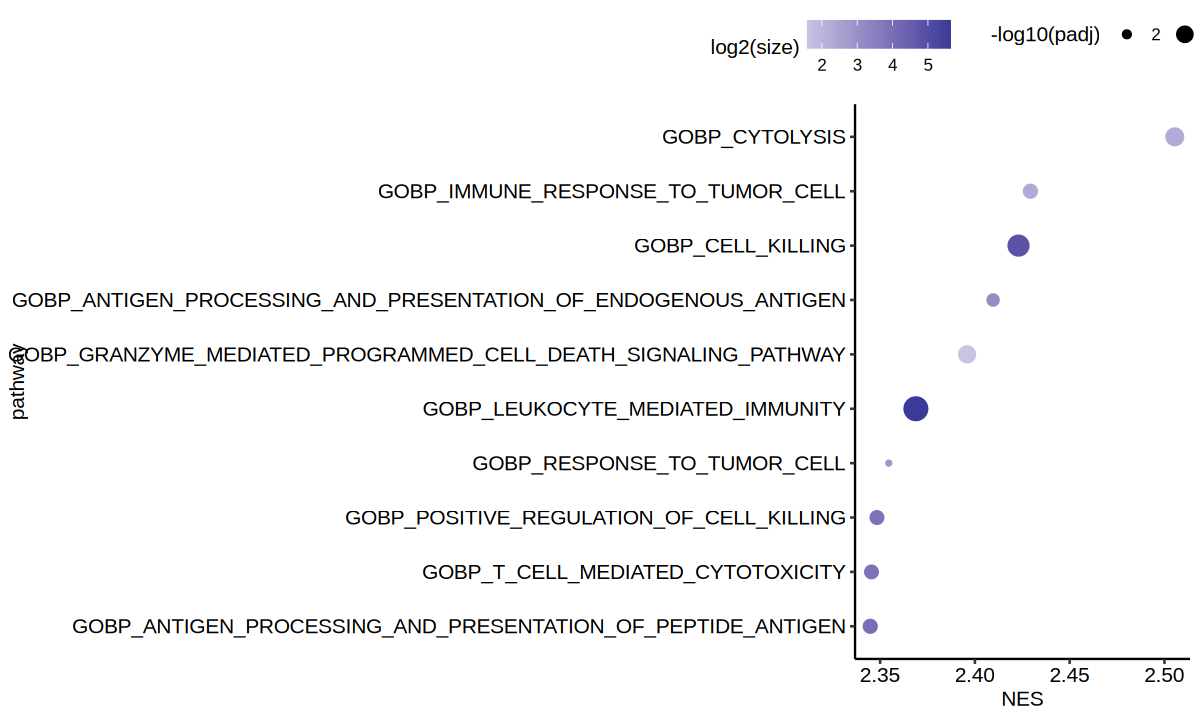

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 6)
df_go_gsea_res %>% arrange(-NES) %>% filter(grepl("GOBP", pathway)) %>% top_n(NES, n = 10) %>%
  arrange(-NES) %>%
  mutate(pathway = factor(pathway, levels = rev(unique(.$pathway)))) %>%
  ggplot(aes(x = NES,y = pathway)) + geom_point(aes(color = log2(size), size = -log10(padj))) + scale_color_gradient2() + theme_pubr()

ggsave("figure_prep/pgsea_go_brown_all.pdf", width = 10, height = 6)

### group 1

In [ ]:
our_sets=  list_res_brown$umap_df %>% 
  filter(Cluster %in% c(1,2,4,5)) %>%
  select(gene_name, kME_brown) %>%
  deframe()
df_go_gsea_res = fgsea(fgsea_sets,our_sets, scoreType = "pos") 
df_go_gsea_res %>% arrange(-NES) %>% filter(grepl("GOBP", pathway)) %>% top_n(NES, n = 10)
df_hallmark_gsea_res = fgsea(fgsea_sets_hallmark,our_sets, scoreType = "pos") 
df_hallmark_gsea_res %>% arrange(-NES) %>% top_n(NES, n = 10)


pathway,pval,padj,log2err,ES,NES,size,leadingEdge
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<list>
GOBP_CYTOLYSIS,1.738856e-07,0.000515310,0.6901325,0.9881423,2.489424,4,"GZMH, GZ...."
GOBP_GRANZYME_MEDIATED_PROGRAMMED_CELL_DEATH_SIGNALING_PATHWAY,1.438157e-05,0.010654947,0.5933255,0.9842520,2.363646,3,"NKG7, GZ...."
GOBP_CELL_KILLING,4.013019e-05,0.023785164,0.5573322,0.6849012,2.261457,18,"NKG7, PR...."
GOBP_IMMUNE_RESPONSE_TO_TUMOR_CELL,6.457014e-04,0.201424842,0.4772708,0.9843137,2.222630,2,"NKG7, PRF1"
GOBP_LEUKOCYTE_MEDIATED_IMMUNITY,1.076782e-05,0.010636810,0.5933255,0.6370899,2.211106,27,"NKG7, PR...."
GOBP_IMMUNE_EFFECTOR_PROCESS,4.458797e-06,0.007907657,0.6105269,0.6087931,2.191328,36,"NKG7, PR...."
GOBP_MODULATION_BY_HOST_OF_SYMBIONT_PROCESS,8.105588e-04,0.218371911,0.4772708,0.8686517,2.188392,4,"CCL5, CX...."
GOBP_PEPTIDYL_TYROSINE_MODIFICATION,1.371412e-03,0.280288148,0.4550599,0.7451022,2.167466,8,"CCL5, IT...."
GOBP_PROTEIN_KINASE_C_SIGNALING,3.348331e-03,0.384719226,0.4317077,0.9568627,2.160644,2,"PLEK, ADGRG1"


pathway,pval,padj,log2err,ES,NES,size,leadingEdge
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<list>
HALLMARK_ALLOGRAFT_REJECTION,0.0003258211,0.0133674,0.49849311,0.6081042,1.973170,21,"GZMA, CC...."
HALLMARK_COMPLEMENT,0.0006365426,0.0133674,0.47727082,0.6151650,1.952202,18,"GZMA, CC...."
HALLMARK_TNFA_SIGNALING_VIA_NFKB,0.0114335416,0.1600696,0.38073040,0.8438018,1.915702,3,"CCL5, PLEK"
HALLMARK_HEDGEHOG_SIGNALING,0.0559440559,0.5874126,0.18820415,0.9531250,1.908875,1,ADGRG1
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,0.1168831169,0.6060606,0.12563992,0.8789062,1.760233,1,LGALS1
HALLMARK_ANGIOGENESIS,0.1258741259,0.6060606,0.12043337,0.8710938,1.744586,1,S100A4
HALLMARK_COAGULATION,0.0709290709,0.5958042,0.16565670,0.8088570,1.738281,2,PLEK
HALLMARK_TGF_BETA_SIGNALING,0.1298701299,0.6060606,0.11828753,0.8632812,1.728940,1,PPP1CA
HALLMARK_APICAL_JUNCTION,0.0899100899,0.6060606,0.14551615,0.5298449,1.502511,10,"PFN1, AR...."


In [ ]:
our_sets=  umap_tom_brown %>% 
  filter(Cluster %in% c(4:7)) %>%
  select(gene_name, kME_brown) %>%
  deframe()
df_go_gsea_res = fgsea(fgsea_sets,our_sets, scoreType = "pos") 
df_go_gsea_res %>% arrange(-NES) %>% filter(grepl("GOBP", pathway)) %>% top_n(NES, n = 10)
df_hallmark_gsea_res = fgsea(fgsea_sets_hallmark,our_sets, scoreType = "pos") 
df_hallmark_gsea_res %>% arrange(-NES) %>% top_n(NES, n = 10)

pathway,pval,padj,log2err,ES,NES,size,leadingEdge
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<list>
GOBP_LEUKOCYTE_MEDIATED_IMMUNITY,8.546692e-08,0.0003037922,0.7049757,0.6610085,2.905544,26,"HLA-B, C...."
GOBP_IMMUNE_EFFECTOR_PROCESS,1.492699e-08,0.0001061160,0.7337620,0.6326741,2.885892,32,"HLA-B, C...."
GOBP_POSITIVE_REGULATION_OF_IMMUNE_EFFECTOR_PROCESS,7.364855e-07,0.0013089189,0.6594444,0.7213487,2.801975,15,"HLA-B, C...."
GOBP_REGULATION_OF_LEUKOCYTE_DIFFERENTIATION,3.009503e-06,0.0026743195,0.6272567,0.7476381,2.737260,12,"HLA-B, L...."
GOBP_REGULATION_OF_T_CELL_ACTIVATION,1.685595e-06,0.0022529880,0.6435518,0.6512784,2.722075,21,"LGALS1, ...."
GOBP_LYMPHOCYTE_MEDIATED_IMMUNITY,2.218444e-06,0.0022529880,0.6272567,0.6537555,2.704412,20,"HLA-B, C...."
GOBP_ADAPTIVE_IMMUNE_RESPONSE,2.184050e-06,0.0022529880,0.6272567,0.6453809,2.697426,21,"HLA-B, C...."
GOBP_REGULATION_OF_IMMUNE_EFFECTOR_PROCESS,7.433325e-06,0.0040648850,0.6105269,0.6374121,2.636803,20,"HLA-B, Z...."
GOBP_T_CELL_ACTIVATION,4.458797e-06,0.0030156244,0.6105269,0.5997520,2.636283,26,"CD8A, LG...."


pathway,pval,padj,log2err,ES,NES,size,leadingEdge
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<list>
HALLMARK_HYPOXIA,0.004945072,0.1202431,0.4070179,0.7324392,2.194306,5,"S100A4, ...."
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,0.024481944,0.2271062,0.3524879,0.7284962,2.032755,4,"LGALS1, ...."
HALLMARK_ALLOGRAFT_REJECTION,0.005465597,0.1202431,0.4070179,0.5074054,1.965493,15,"CD8A, CD...."
HALLMARK_ANGIOGENESIS,0.015470332,0.2268982,0.3807304,0.9889807,1.958324,1,S100A4
HALLMARK_IL2_STAT5_SIGNALING,0.030969031,0.2271062,0.2572065,0.5658263,1.852108,7,"PRKCH, I...."
HALLMARK_UV_RESPONSE_DN,0.044955045,0.2825746,0.2114002,0.6600813,1.841854,4,"ANXA2, M...."
HALLMARK_HEME_METABOLISM,0.117882118,0.5680473,0.1250334,0.8870523,1.756491,1,UCP2
HALLMARK_MITOTIC_SPINDLE,0.069930070,0.3846154,0.1669338,0.5850933,1.752874,5,"PXN, VCL...."
HALLMARK_INTERFERON_GAMMA_RESPONSE,0.029970030,0.2271062,0.2616635,0.4001304,1.726782,24,"HLA-B, C...."


In [ ]:
our_sets=  umap_tom_brown %>% 
  filter(Cluster %in% c(1,2,3)) %>%
  select(gene_name, kME_brown) %>%
  deframe()
df_go_gsea_res = fgsea(fgsea_sets,our_sets, scoreType = "pos") 
df_go_gsea_res %>% arrange(-NES) %>% filter(grepl("GOBP", pathway)) %>% top_n(NES, n = 10)
df_hallmark_gsea_res = fgsea(fgsea_sets_hallmark,our_sets, scoreType = "pos") 
df_hallmark_gsea_res %>% arrange(-NES) %>% top_n(NES, n = 10)

pathway,pval,padj,log2err,ES,NES,size,leadingEdge
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<list>
GOBP_LEUKOCYTE_MEDIATED_IMMUNITY,2.184050e-06,0.005631573,0.6272567,0.6441565,2.526799,24,"NKG7, PR...."
GOBP_GRANZYME_MEDIATED_PROGRAMMED_CELL_DEATH_SIGNALING_PATHWAY,3.900769e-05,0.033527107,0.5573322,0.9794872,2.497920,3,"NKG7, GZ...."
GOBP_CYTOLYSIS,2.848094e-04,0.068150366,0.4984931,0.8482208,2.417108,5,"GZMH, GZ...."
GOBP_LYMPHOCYTE_MEDIATED_IMMUNITY,2.387596e-05,0.030782086,0.5756103,0.6290004,2.402501,20,"NKG7, PR...."
GOBP_IMMUNE_RESPONSE_TO_TUMOR_CELL,5.999077e-04,0.088392120,0.4772708,0.8814433,2.384889,4,"NKG7, PR...."
GOBP_LEUKOCYTE_MEDIATED_CYTOTOXICITY,8.178477e-05,0.047861489,0.5384341,0.6445806,2.353301,16,"NKG7, PR...."
GOBP_CELL_KILLING,8.968111e-05,0.047861489,0.5384341,0.6287283,2.352453,18,"NKG7, PR...."
GOBP_MYELOID_LEUKOCYTE_MIGRATION,4.534136e-04,0.075427544,0.4984931,0.7901507,2.350080,6,"CCL5, CC...."
GOBP_PEPTIDE_ANTIGEN_ASSEMBLY_WITH_MHC_CLASS_II_PROTEIN_COMPLEX,8.014000e-04,0.100800489,0.4772708,0.8238342,2.347615,5,"B2M, HLA...."


pathway,pval,padj,log2err,ES,NES,size,leadingEdge
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<list>
HALLMARK_COMPLEMENT,0.0009664383,0.03962397,0.47727082,0.6470404,2.213564,11,"GZMA, CC...."
HALLMARK_TNFA_SIGNALING_VIA_NFKB,0.0050937937,0.10315192,0.40701792,0.7234715,2.161694,6,"CCL5, PL...."
HALLMARK_ALLOGRAFT_REJECTION,0.0075477016,0.10315192,0.40701792,0.5135572,1.949368,20,"GZMA, CC...."
HALLMARK_COAGULATION,0.0309690310,0.31743257,0.25720647,0.8316327,1.905634,2,"PLEK, PRSS23"
HALLMARK_HEDGEHOG_SIGNALING,0.0949050949,0.44235764,0.14122512,0.9187817,1.857553,1,ADGRG1
HALLMARK_ESTROGEN_RESPONSE_EARLY,0.0709290709,0.44235764,0.16565670,0.6239703,1.702229,4,"PRSS23, ...."
HALLMARK_INTERFERON_GAMMA_RESPONSE,0.0419580420,0.34405594,0.21925035,0.4744789,1.672470,13,"GZMA, CC...."
HALLMARK_MTORC1_SIGNALING,0.0919080919,0.44235764,0.14375899,0.5803109,1.664285,5,"CTSC, IT...."
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,0.1078921079,0.44235764,0.13145761,0.6358974,1.633763,3,"FLNA, TG...."
